# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error

# Reading csv file

In [8]:
df = pd.read_csv(r"../Data/data.csv") 

# Initial data inspection

In [119]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

In [120]:
df.head(1)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.0,197038.0,545901.0,NaN,0.0785,7993.0,0.3414,849005.0,0.64,212.0,2/3/2023,23/12/2023,3.0,3.0,Medium


In [9]:
df.shape # To see dimensions

(5000, 19)

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4020 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Campaign_ID             3810 non-null   object        
 1   Channel                 4020 non-null   object        
 2   Product_Category        4020 non-null   object        
 3   Region                  4020 non-null   object        
 4   Budget                  3616 non-null   float64       
 5   Spend                   3627 non-null   float64       
 6   Impressions             3627 non-null   float64       
 7   Clicks                  3629 non-null   float64       
 8   CTR                     3611 non-null   float64       
 9   Conversions             3621 non-null   float64       
 10  CR                      3621 non-null   float64       
 11  Revenue                 3596 non-null   float64       
 12  ROI                     3616 non-null   float64      

In [109]:
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness
count,3821.000000,3823.000000,3.829000e+03,3831.000000,3817.000000,3825.000000,3822.000000,3.802000e+03,3824.000000,4249,4249,3814.000000,3828.000000
mean,258316.563946,225436.496406,5.026237e+05,25396.428006,0.498331,5003.214617,0.502697,5.050001e+05,2.522329,2022-07-29 00:00:57.652459008,2022-11-08 14:47:19.578824704,2.991085,5.541275
min,10014.000000,1.000000,1.593000e+03,104.000000,0.000500,13.000000,0.000300,0.000000e+00,0.000000,1900-01-01 00:00:00,1900-01-01 00:00:00,1.000000,1.000000
25%,136717.000000,110515.500000,2.535030e+05,12307.000000,0.243000,2558.000000,0.263225,2.500715e+05,1.247500,2023-03-23 00:00:00,2023-04-07 00:00:00,2.000000,3.000000
50%,261539.000000,226608.000000,5.045720e+05,25698.000000,0.495400,4982.000000,0.505725,5.021112e+05,2.570000,2023-06-24 00:00:00,2023-07-07 00:00:00,3.000000,6.000000
75%,379156.000000,335711.500000,7.498180e+05,37921.000000,0.752300,7430.000000,0.746050,7.551570e+05,3.780000,2023-09-27 00:00:00,2023-10-08 00:00:00,4.000000,8.000000
max,735775.035200,581673.197900,1.411957e+06,76213.209580,1.438756,14877.828130,1.479276,1.467097e+06,7.366649,2024-01-01 00:00:00,2024-11-29 00:00:00,5.000000,10.000000
std,140596.601663,129452.814733,2.874246e+05,14750.499812,0.290522,2854.408148,0.286928,2.912473e+05,1.454725,NaN,NaN,1.399646,2.838501


In [ ]:
df.duplicated().sum() #No duplicates

np.int64(0)

## Nulls by colums (%)

In [280]:
#Cantidad de nulos por columna en porcentaje
df.isnull().sum() / df.shape[0] * 100

Campaign_ID                5.223881
Channel                    0.000000
Product_Category           0.000000
Region                     0.000000
Budget                    10.049751
Spend                      9.776119
Impressions                9.776119
Clicks                     9.726368
CTR                       10.174129
Conversions                9.925373
CR                         9.925373
Revenue                   10.547264
ROI                       10.049751
Duration                   0.000000
Start_Date                 0.000000
End_Date                   0.000000
Customer_Satisfaction      0.000000
Campaign_Effectiveness     0.000000
Market_Segment             0.000000
dtype: float64

## Heatmap

<Axes: >

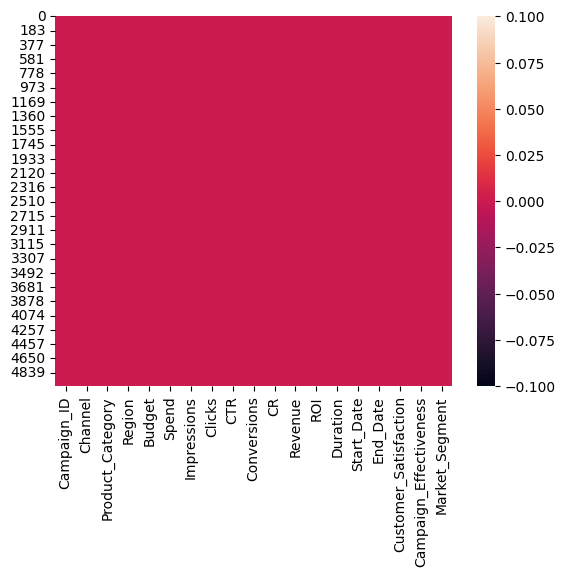

In [76]:
sns.heatmap(df.isnull(), cbar=True)

# Outlier treatment

### Histogramas

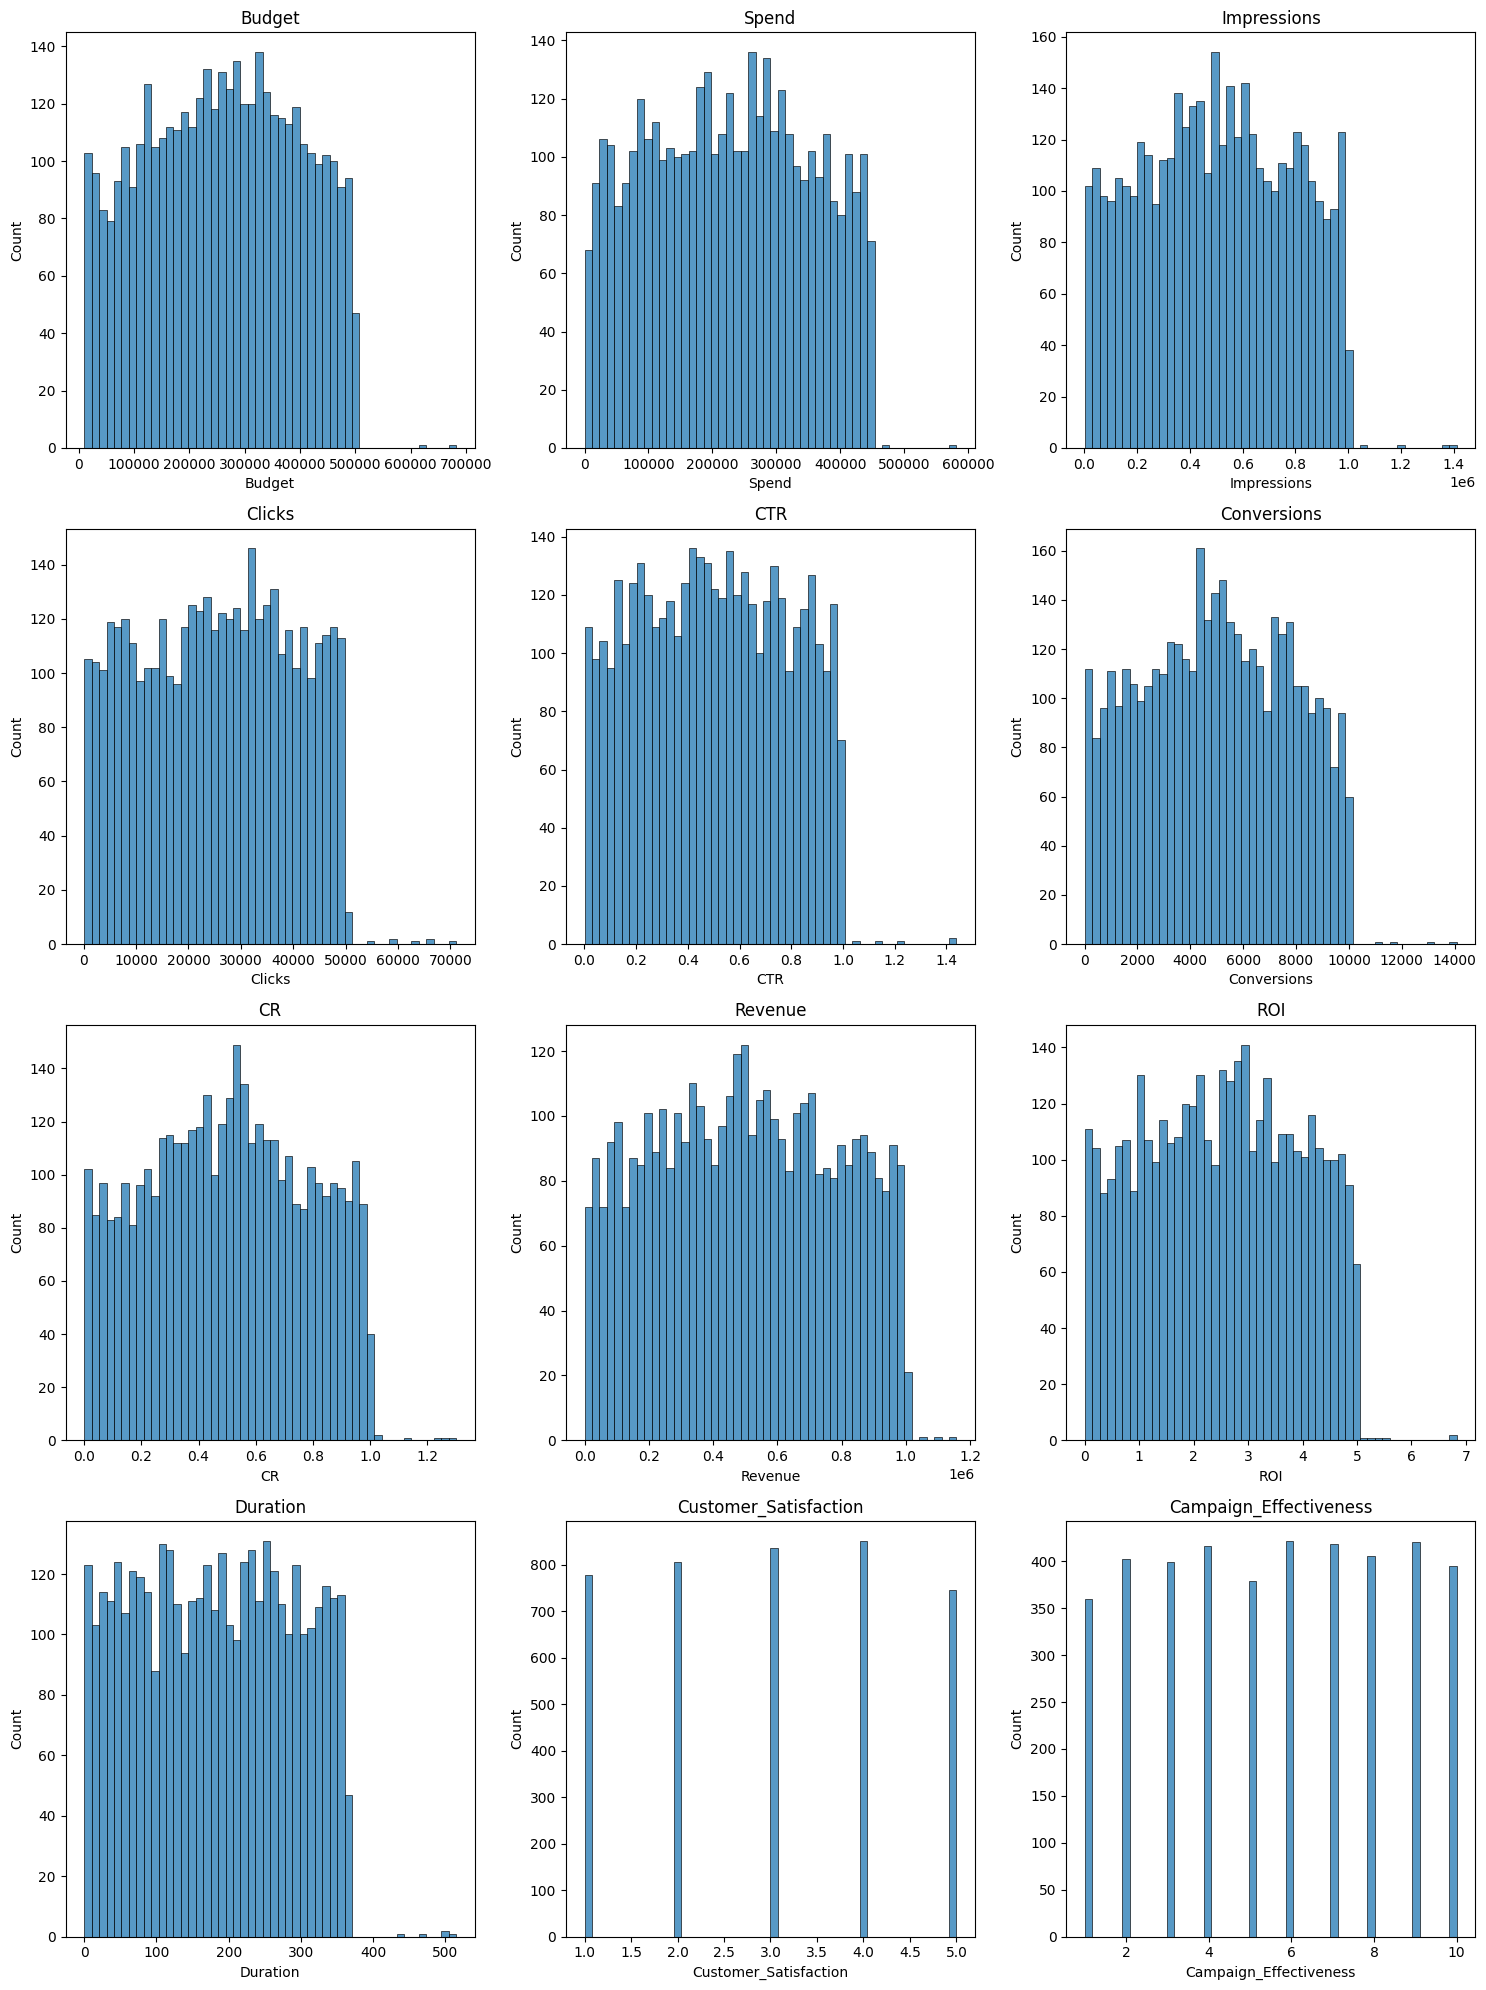

In [83]:
# sacar una lista de variables numericas
numeric_columns = df.select_dtypes(include = "number").columns

# Graficar la distribucion de las variables numericas con un hisplot y un bucle
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar la distribución de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=50, ax=axes[i])
    axes[i].set_title(col)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()


### Regresiones

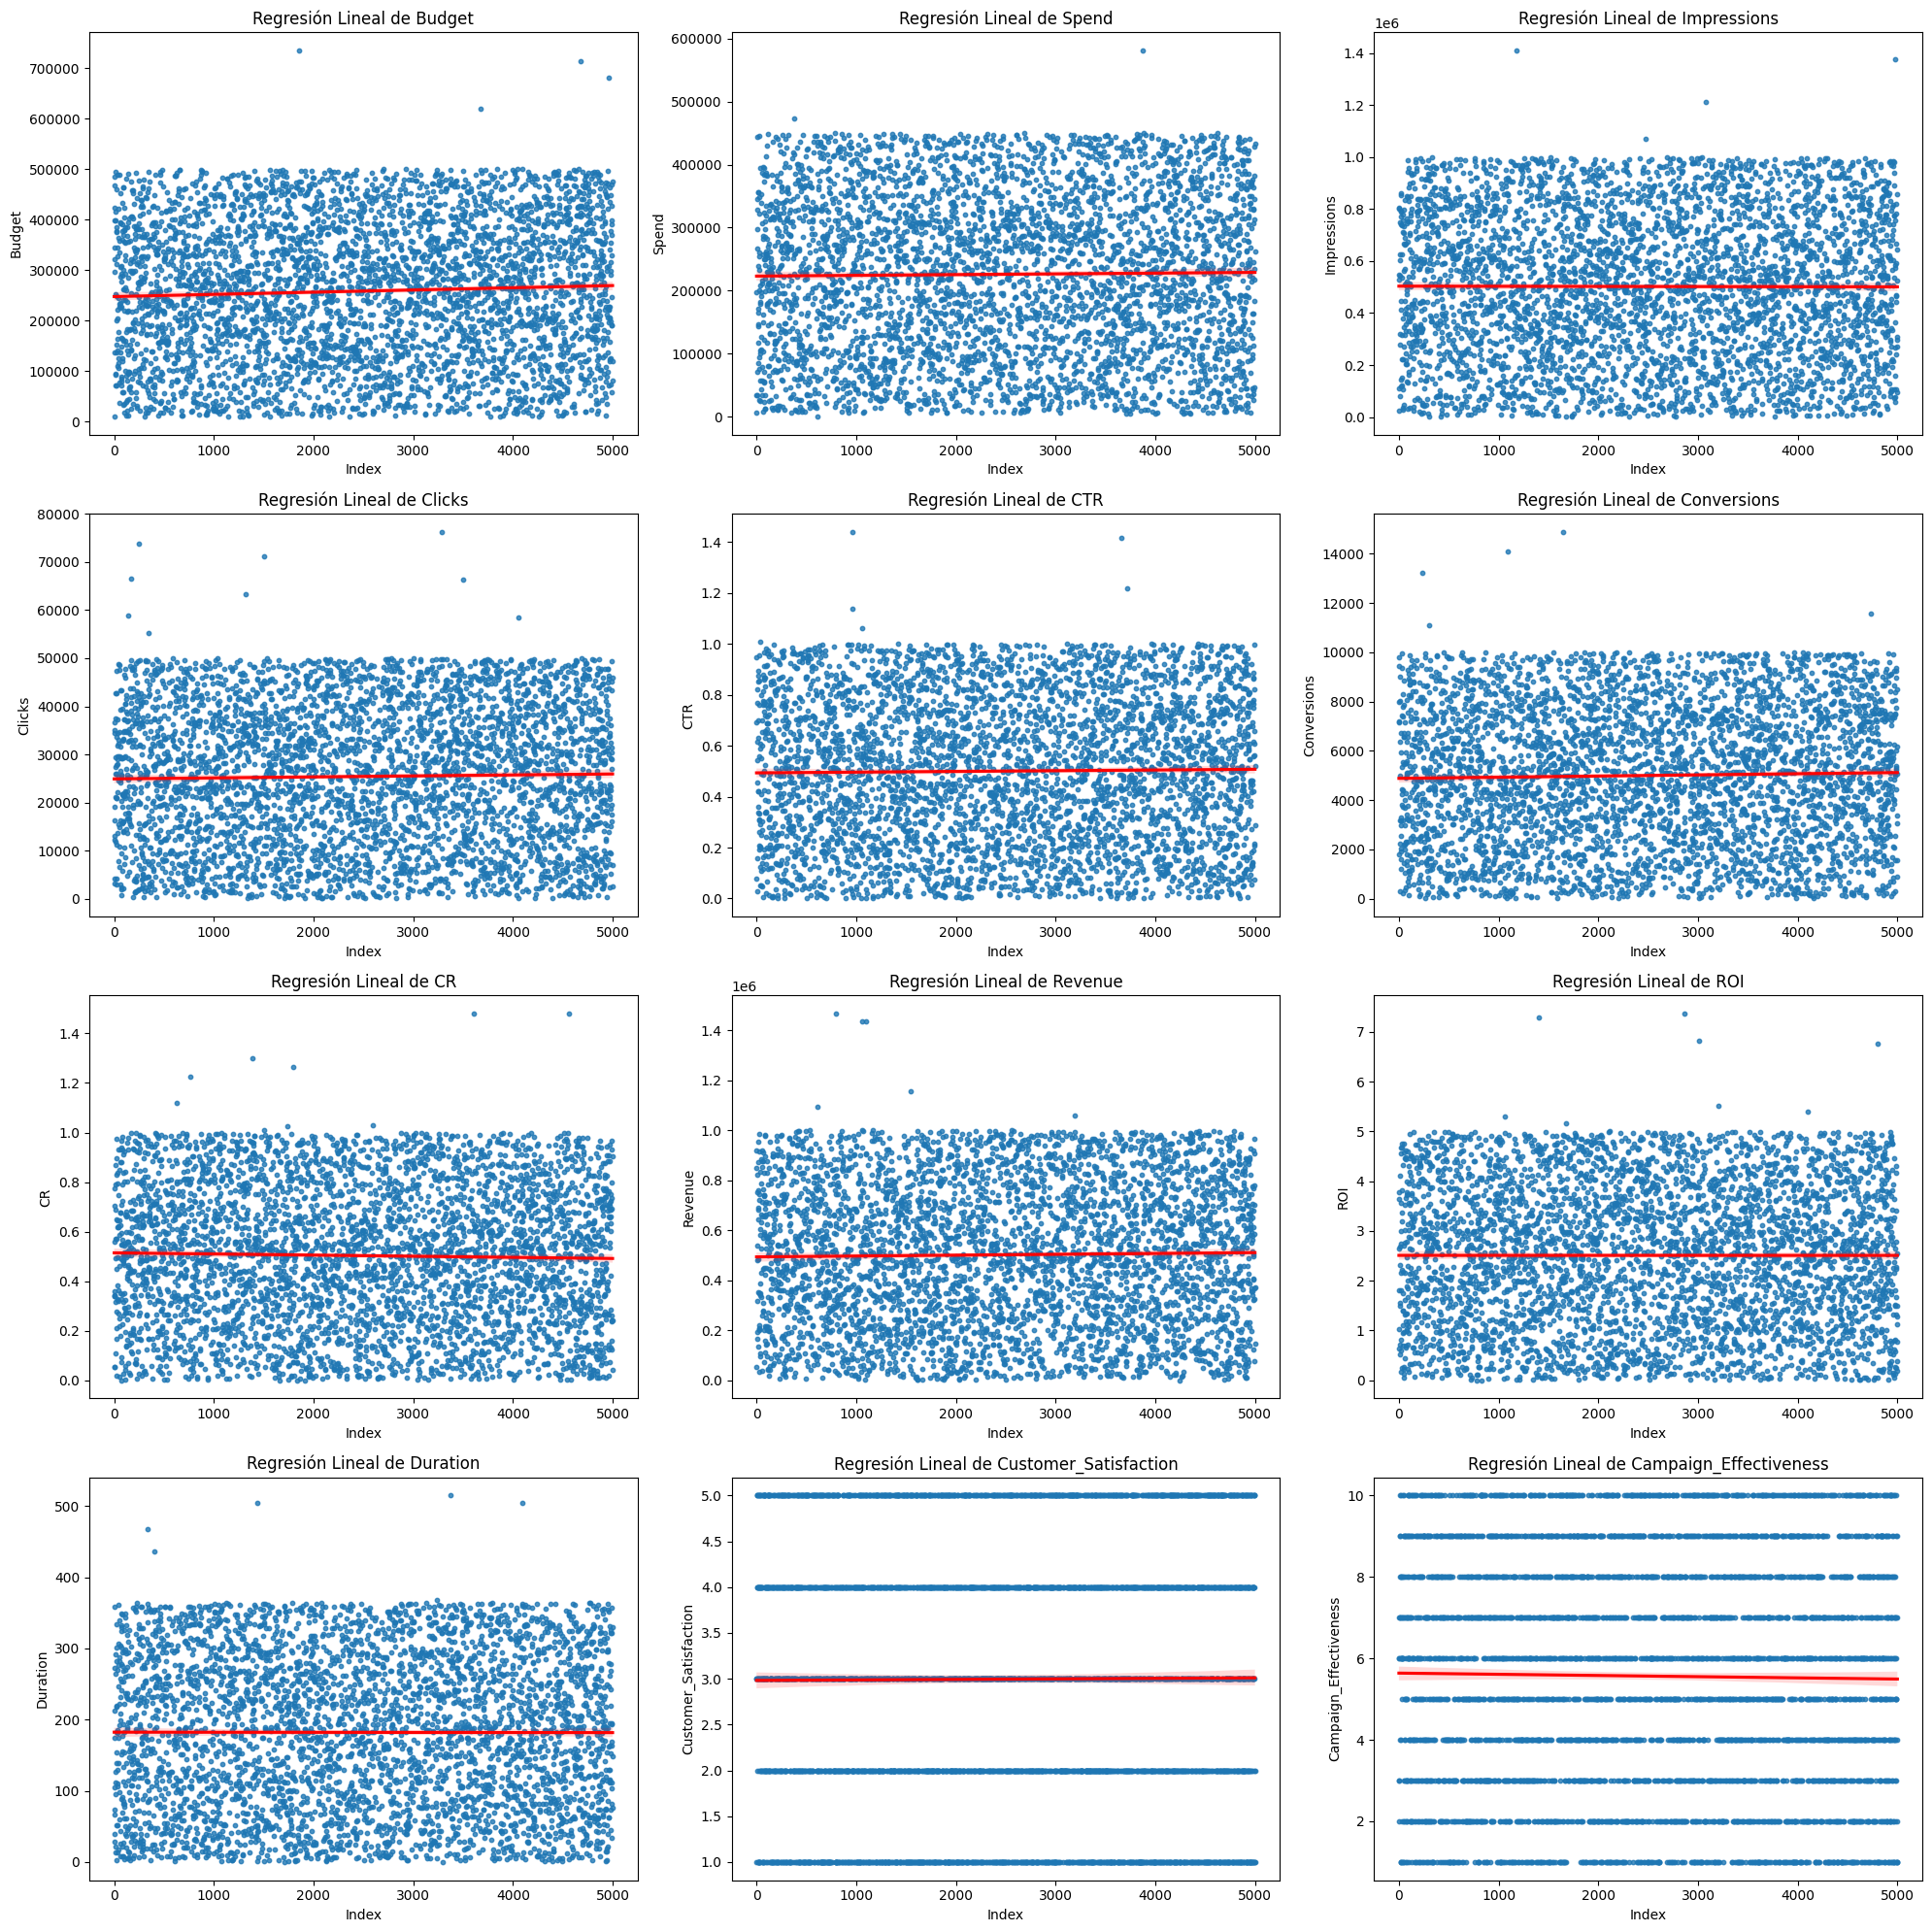

In [78]:
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar la distribución de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.regplot(x=df.index, y=col, data=df, scatter_kws={'s':10}, line_kws={'color':'red'}, ax=axes[i])
    axes[i].set_title(f'Regresión Lineal de {col}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(col)

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

### Boxplots

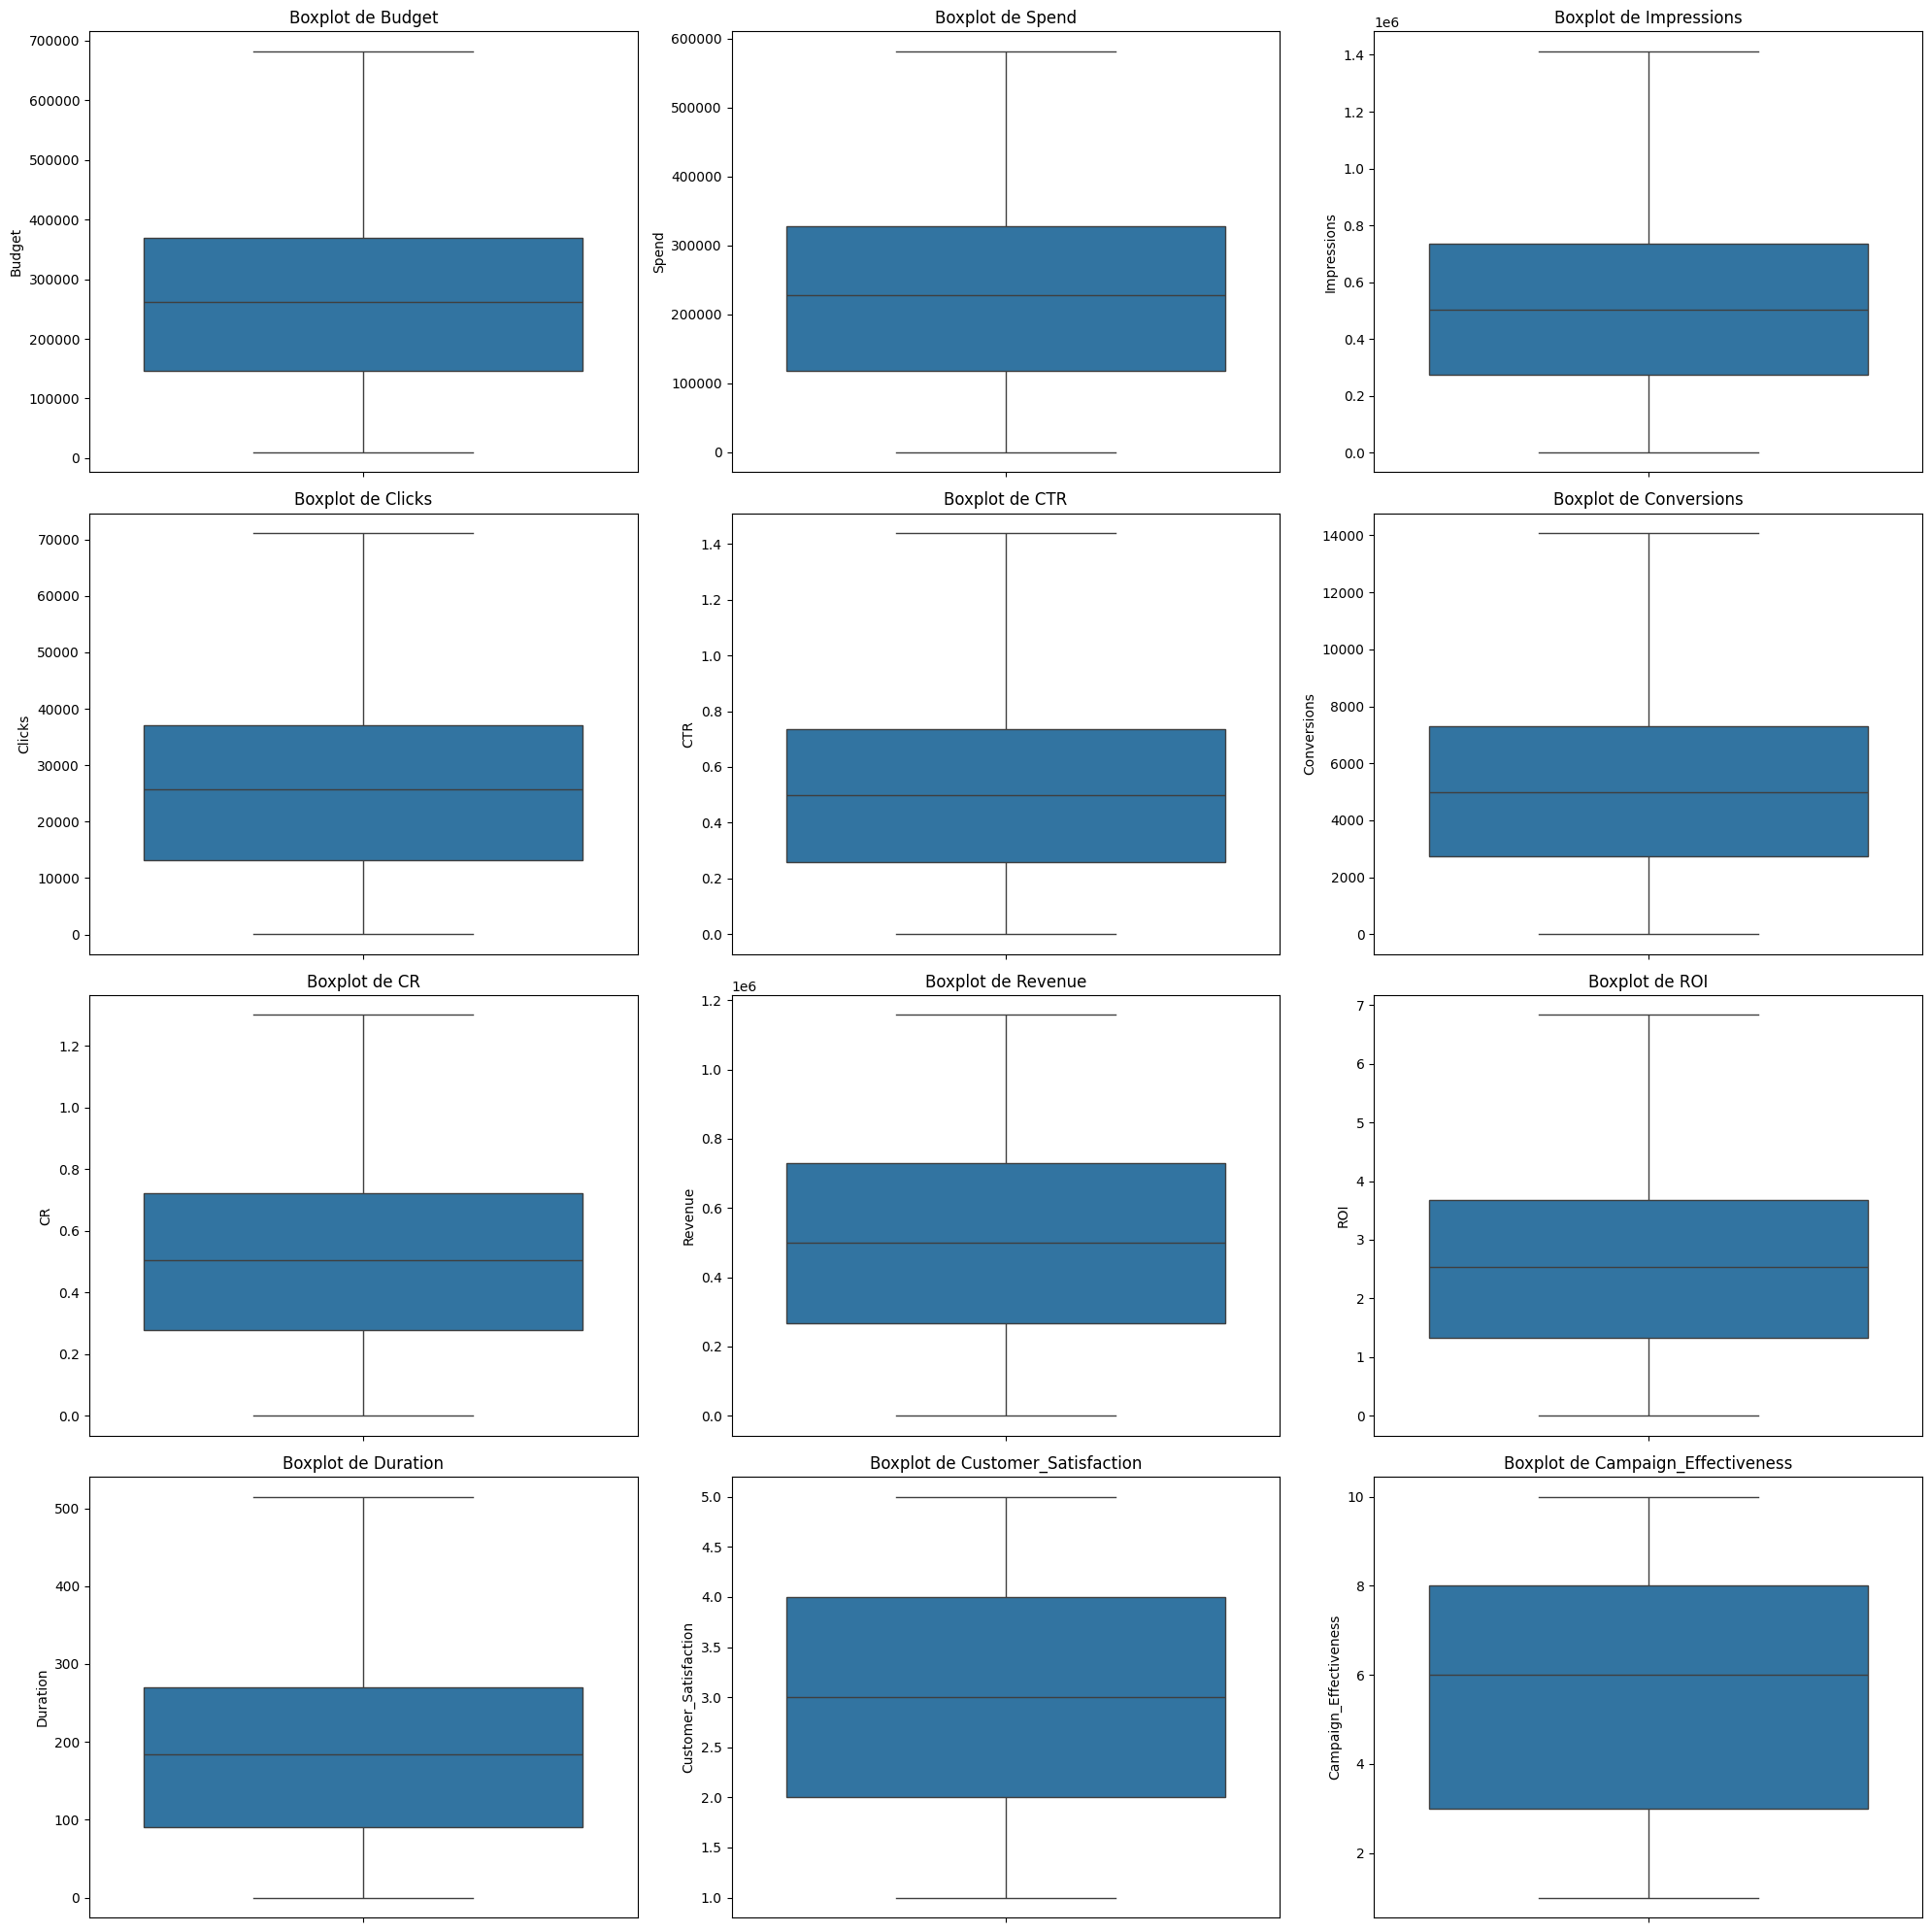

In [81]:
# Definir el tamaño del lienzo
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))

# Aplanar los ejes para iterar fácilmente
axes = axes.flatten()

# Graficar el boxplot de las variables numéricas
for i, col in enumerate(numeric_columns):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

# Ajustar el diseño para evitar superposición
plt.tight_layout()
plt.show()

### Eliminar outliers que superen el Q3 + 3.0 * IQR Y EL RESTO LOS REEMPLAZO POR LA MEDIANA

In [80]:
# sacar una lista de variables numericas
numeric_columns = df.select_dtypes(include = "number").columns

# Calcular el rango intercuartílico (IQR) para todas las columnas numéricas
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior para todas las columnas numéricas
extreme_upper_bound = Q3 + 3.0 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Eliminar los outliers que superen el límite superior extremo
df = df[~((df[numeric_columns] > extreme_upper_bound)).any(axis=1)]

# Calcular las medianas de las columnas numéricas
medians = df[numeric_columns].median()

# Reemplazar los outliers restantes por la mediana de cada columna
for col in numeric_columns:
    df.loc[(df[col] < lower_bound[col]) | (df[col] > upper_bound[col]), col] = medians[col]

# Verificar el resultado
df.describe()

#Crear copia de estos resultados en una df_sin_outliers
df_sin_outliers = df.copy()

In [82]:
df.shape

(4020, 19)

CLASE LUNES 01:00:00 HABLAN DE LAS FECHAS
1:49 knn 

# Nulls treatment

### Duration and Dates

In [13]:
# Convertir las columnas Start_Date y End_Date a formato de fecha
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce', dayfirst=True)
df['End_Date'] = pd.to_datetime(df['End_Date'], errors='coerce', dayfirst=True)

# Calcular la duración en días
df['Calculated_Duration'] = (df['End_Date'] - df['Start_Date']).dt.days

# Asegurarse de que la duración no sea negativa
df.loc[df['Calculated_Duration'] < 0, 'Calculated_Duration'] = np.nan

# Rellenar los valores nulos de Duration con los valores calculados
df['Duration'] = df['Duration'].fillna(df['Calculated_Duration'])

# Eliminar la columna Calculated_Duration
df = df.drop(columns=['Calculated_Duration'])

In [14]:
# Reparar Start_Date si End_Date y Duration están presentes
df.loc[df['Start_Date'].isnull() & df['End_Date'].notnull() & df['Duration'].notnull(), 'Start_Date'] = \
    df['End_Date'] - pd.to_timedelta(df['Duration'], unit='D')

# Reparar End_Date si Start_Date y Duration están presentes
df.loc[df['End_Date'].isnull() & df['Start_Date'].notnull() & df['Duration'].notnull(), 'End_Date'] = \
    df['Start_Date'] + pd.to_timedelta(df['Duration'], unit='D')

No quiero valores `Nat`entonces los relleno con 1900-01-01

In [15]:
# Rellenar los valores NaT en las columnas de fecha con una fecha predeterminada
df['Start_Date'] = df['Start_Date'].fillna(pd.Timestamp('1900-01-01'))
df['End_Date'] = df['End_Date'].fillna(pd.Timestamp('1900-01-01'))

In [16]:
# Eliminar las filas de Duration que no se pueden calcular
df = df.dropna(subset=['Duration'])

In [17]:
df.shape

(4020, 19)

### Channel, Product Category, Region y Market Segment

In [18]:
# Mostrar los valores únicos de la columna 'Region', "Channnel" y "Product_Category" y la cantidad de veces que se repiten
channel_value_counts = df['Channel'].value_counts()
product_category_value_counts = df['Product_Category'].value_counts()
region_value_counts = df['Region'].value_counts()
market_segment_value_counts = df['Market_Segment'].value_counts()

print(channel_value_counts)
print(product_category_value_counts)
print(region_value_counts)
print(market_segment_value_counts)



Channel
Social Media    793
Billboard       781
Radio           779
Email           731
TV              722
Name: count, dtype: int64
Product_Category
Groceries      807
Electronics    782
Health         762
Automotive     735
Fashion        724
Name: count, dtype: int64
Region
Kuala Lumpur    803
Sarawak         786
Penang          751
Sabah           742
Johor           722
Name: count, dtype: int64
Market_Segment
High      1283
Medium    1273
Low       1255
Name: count, dtype: int64


Al  no haber mucha diferencia entre la cantidad de veces que se repite cada valor, usar la moda para reparar los nulos no sería la mejor estrategia. Por ende voy a reparar los datos nulos de manera proporcional a la frecuencia que se repite cada valor. 

In [21]:
null_count_region = df['Region'].isnull().sum()
null_count_channel = df['Channel'].isnull().sum()
null_count_product_category = df['Product_Category'].isnull().sum()
null_count_market_segment = df['Market_Segment'].isnull().sum()

print(f"La cantidad de valores nulos en la columna 'Region' es: {null_count_region}")
print(f"La cantidad de valores nulos en la columna 'Channel' es: {null_count_channel}")
print(f"La cantidad de valores nulos en la columna 'Product_Category' es: {null_count_product_category}")
print(f"La cantidad de valores nulos en la columna 'Market_Segment' es: {null_count_market_segment}")

La cantidad de valores nulos en la columna 'Region' es: 0
La cantidad de valores nulos en la columna 'Channel' es: 0
La cantidad de valores nulos en la columna 'Product_Category' es: 0
La cantidad de valores nulos en la columna 'Market_Segment' es: 0


In [20]:
# Calcular las frecuencias de los valores más comunes
value_counts_region = df['Region'].value_counts()
value_counts_channel = df['Channel'].value_counts()
value_counts_product_category = df['Product_Category'].value_counts()
value_counts_market_segment = df['Market_Segment'].value_counts()

# Seleccionar los valores más comunes, pongo 5 ya que todos tienen una frecuencia parecida, si hubiese dos valores dominantes pondría 2
top_values_region = value_counts_region.nlargest(5)
top_values_channel = value_counts_channel.nlargest(5)
top_values_product_category = value_counts_product_category.nlargest(5)
top_values_market_segment = value_counts_market_segment.nlargest(3)

# Calcular las proporciones
total_top_values_region = top_values_region.sum()
proportions = top_values_region / total_top_values_region

total_top_values_channel = top_values_channel.sum()
proportions_channel = top_values_channel / total_top_values_channel

total_top_values_product_category = top_values_product_category.sum()
proportions_product_category = top_values_product_category / total_top_values_product_category

total_top_values_market_segment = top_values_market_segment.sum()
proportions_market_segment = top_values_market_segment / total_top_values_market_segment

# Crear una lista de valores para rellenar los nulos
fill_values = np.random.choice(top_values_region.index, size=df['Region'].isnull().sum(), p=proportions)
fill_values_channel = np.random.choice(top_values_channel.index, size=df['Channel'].isnull().sum(), p=proportions_channel)
fill_values_product_category = np.random.choice(top_values_product_category.index, size=df['Product_Category'].isnull().sum(), p=proportions_product_category)
fill_values_market_segment = np.random.choice(top_values_market_segment.index, size=df['Market_Segment'].isnull().sum(), p=proportions_market_segment)

# Rellenar los valores nulos de manera proporcional
df.loc[df['Region'].isnull(), 'Region'] = fill_values
df.loc[df['Channel'].isnull(), 'Channel'] = fill_values_channel
df.loc[df['Product_Category'].isnull(), 'Product_Category'] = fill_values_product_category
df.loc[df['Market_Segment'].isnull(), 'Market_Segment'] = fill_values_market_segment

# Verificar el resultado
print(df['Region'].value_counts())
print(df['Channel'].value_counts())
print(df['Product_Category'].value_counts())
print(df['Market_Segment'].value_counts())

Region
Kuala Lumpur    840
Sarawak         823
Sabah           797
Penang          792
Johor           768
Name: count, dtype: int64
Channel
Radio           831
Social Media    830
Billboard       820
Email           770
TV              769
Name: count, dtype: int64
Product_Category
Groceries      850
Electronics    828
Health         806
Automotive     771
Fashion        765
Name: count, dtype: int64
Market_Segment
High      1365
Medium    1333
Low       1322
Name: count, dtype: int64


### Campaign Effectiveness Y Customer Satisfaction

In [22]:
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].round()

In [23]:
# Mostrar los valores únicos de la columna 'Campaign_Effectiveness' y cuántas veces se repiten
campaign_effectiveness_counts = df['Campaign_Effectiveness'].value_counts()
print("Campaign_Effectiveness counts:")
print(campaign_effectiveness_counts)

# Mostrar los valores únicos de la columna 'Customer_Satisfaction' y cuántas veces se repiten
customer_satisfaction_counts = df['Customer_Satisfaction'].value_counts()
print("\nCustomer_Satisfaction counts:")
print(customer_satisfaction_counts)

Campaign_Effectiveness counts:
Campaign_Effectiveness
6.0     384
7.0     376
3.0     371
9.0     371
4.0     371
2.0     364
8.0     363
10.0    350
5.0     347
1.0     324
Name: count, dtype: int64

Customer_Satisfaction counts:
Customer_Satisfaction
4.0    770
3.0    734
2.0    723
1.0    713
5.0    669
Name: count, dtype: int64


In [26]:
#Null count de Campaign_Effectiveness y Customer_Satisfaction
null_count_campaign_effectiveness = df['Campaign_Effectiveness'].isnull().sum()
null_count_customer_satisfaction = df['Customer_Satisfaction'].isnull().sum()

print(f"\nLa cantidad de valores nulos en la columna 'Campaign_Effectiveness' es: {null_count_campaign_effectiveness}")
print(f"La cantidad de valores nulos en la columna 'Customer_Satisfaction' es: {null_count_customer_satisfaction}")


La cantidad de valores nulos en la columna 'Campaign_Effectiveness' es: 0
La cantidad de valores nulos en la columna 'Customer_Satisfaction' es: 0


In [25]:
# calcular las frecuencias de los valores más comunes
value_counts_campaign_effectiveness = df['Campaign_Effectiveness'].value_counts()
value_counts_customer_satisfaction = df['Customer_Satisfaction'].value_counts()

# Seleccionar los valores más comunes
top_values_campaign_effectiveness = value_counts_campaign_effectiveness.nlargest(10)
top_values_customer_satisfaction = value_counts_customer_satisfaction.nlargest(5)

# Calcular las proporciones
total_top_values_campaign_effectiveness = top_values_campaign_effectiveness.sum()
proportions_campaign_effectiveness = top_values_campaign_effectiveness / total_top_values_campaign_effectiveness

total_top_values_customer_satisfaction = top_values_customer_satisfaction.sum()
proportions_customer_satisfaction = top_values_customer_satisfaction / total_top_values_customer_satisfaction

# Crear una lista de valores para rellenar los nulos
fill_values_campaign_effectiveness = np.random.choice(top_values_campaign_effectiveness.index, size=df['Campaign_Effectiveness'].isnull().sum(), p=proportions_campaign_effectiveness)
fill_values_customer_satisfaction = np.random.choice(top_values_customer_satisfaction.index, size=df['Customer_Satisfaction'].isnull().sum(), p=proportions_customer_satisfaction)

# Rellenar los valores nulos de manera proporcional
df.loc[df['Campaign_Effectiveness'].isnull(), 'Campaign_Effectiveness'] = fill_values_campaign_effectiveness
df.loc[df['Customer_Satisfaction'].isnull(), 'Customer_Satisfaction'] = fill_values_customer_satisfaction

# Verificar el resultado
print(df['Campaign_Effectiveness'].value_counts())
print(df['Customer_Satisfaction'].value_counts())


Campaign_Effectiveness
6.0     422
9.0     421
7.0     419
4.0     416
8.0     406
2.0     403
3.0     399
10.0    395
5.0     379
1.0     360
Name: count, dtype: int64
Customer_Satisfaction
4.0    852
3.0    837
2.0    806
1.0    778
5.0    747
Name: count, dtype: int64


# Numeric nulls treatment: KNN

STRATEGIA : Crear un Dataframe de entrenamiento donde voy a fixear las columnas que me quedan con valores nulos por su media, menos CR, CTR Y ROI, que son las que voy a predecir con knn <br/>
1. PARA PREDECIR CTR
- Clicks x su media
- Impresions x su media

2. PARA PREDECIR CR
- Conversions x su media

3. PARA ROI 
- Spend x su media
- Revenue x su media

BUDGET


In [27]:
df_trainning2 = df.copy()


In [28]:
df_trainning2.shape

(4020, 19)

In [29]:
# Bucle para rellenar los valores nulos de las columnas numéricas con la media en el dataframe df_trainning2
columns_to_repair = ["Clicks", "Impressions", "Conversions", "Spend", "Revenue","Budget"]

for column in columns_to_repair:
    df_trainning2[column].fillna(df_trainning2[column].mean(), inplace=True)

# Verificar el resultado
print(df_trainning2[columns_to_repair].isnull().sum())

Clicks         0
Impressions    0
Conversions    0
Spend          0
Revenue        0
Budget         0
dtype: int64


C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\342286492.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning2[column].fillna(df_trainning2[column].mean(), inplace=True)


In [30]:
# Vemos como los nulls de CTR, CR Y ROI siguen existiendo
print(df_trainning2.isnull().sum())

Campaign_ID               210
Channel                     0
Product_Category            0
Region                      0
Budget                      0
Spend                       0
Impressions                 0
Clicks                      0
CTR                       409
Conversions                 0
CR                        399
Revenue                     0
ROI                       404
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64


## 1. CTR

In [31]:
# Seleccionar solo las columnas CTR, Impressions y Clicks que son las que influyen en el CTR
df_repair_ctr = df_trainning2[["CTR", "Impressions", "Clicks"]]

In [32]:
df_with_ctr = df_repair_ctr.dropna(subset=['CTR'])
df_without_ctr = df_repair_ctr[df_repair_ctr['CTR'].isnull()].drop(columns='CTR')

In [33]:
x_train, x_test, y_train, y_test = train_test_split(df_with_ctr.drop(columns='CTR'), df_with_ctr['CTR'], test_size=0.2, random_state=42)

scores: [-0.17114121 -0.16986636 -0.15925112 -0.16521623 -0.17545915]
scores: [-0.1287982  -0.12768458 -0.11733372 -0.12410234 -0.12944405]
scores: [-0.1169768  -0.11659795 -0.11315804 -0.10967812 -0.11208722]
scores: [-0.1121837  -0.10924123 -0.10300537 -0.10345657 -0.10709195]
scores: [-0.10549442 -0.10515279 -0.10081273 -0.09660059 -0.10341916]
scores: [-0.10185959 -0.10522122 -0.10047369 -0.09347146 -0.10104126]
scores: [-0.09877896 -0.10346526 -0.09807545 -0.09141265 -0.09931193]
scores: [-0.09764168 -0.10232395 -0.09664285 -0.0912179  -0.09710782]
scores: [-0.09622919 -0.10137854 -0.09536916 -0.09002497 -0.09490054]
scores: [-0.09577928 -0.0990214  -0.09473924 -0.08982055 -0.09361583]


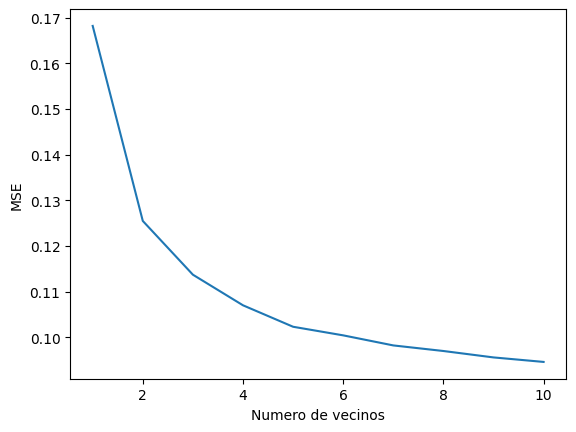

In [101]:
mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()


In [34]:
# Predecir los valores de CTR faltantes en el data set original
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_ctr = knn.predict(df_without_ctr)
df.loc[df['CTR'].isna(), 'CTR'] = imputed_ctr

## 2. CR

In [35]:
df_repair_cr = df_trainning2[["CR", "Impressions", "Conversions"]]

In [36]:
df_with_cr = df_repair_cr.dropna(subset=['CR'])
df_without_cr = df_repair_cr[df_repair_cr['CR'].isnull()].drop(columns='CR')

In [37]:
x_train, x_test, y_train, y_test = train_test_split(df_with_cr.drop(columns='CR'), df_with_cr['CR'], test_size=0.2, random_state=42)

scores: [-0.15428441 -0.17267245 -0.16438614 -0.16611265 -0.1681982 ]
scores: [-0.11335897 -0.13062749 -0.1238286  -0.12139521 -0.12812124]
scores: [-0.10099789 -0.11740876 -0.11009534 -0.10677792 -0.10945333]
scores: [-0.09837625 -0.10781605 -0.10358007 -0.10048077 -0.10513611]
scores: [-0.096101   -0.10546107 -0.10123331 -0.09861188 -0.09787658]
scores: [-0.09246903 -0.10278293 -0.09855272 -0.09445646 -0.09488545]
scores: [-0.09019777 -0.09912489 -0.09700962 -0.0933442  -0.09220328]
scores: [-0.08938336 -0.09739167 -0.0957     -0.09252954 -0.08983225]
scores: [-0.08732717 -0.09690555 -0.09496541 -0.09218394 -0.0891296 ]
scores: [-0.08550104 -0.09555038 -0.09377166 -0.09141867 -0.0884458 ]


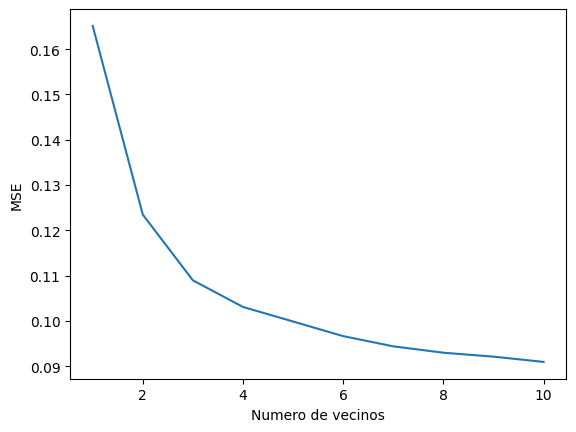

In [38]:
mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

In [39]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_cr = knn.predict(df_without_cr)
df.loc[df['CR'].isna(), 'CR'] = imputed_cr

## 3. ROI

In [40]:
df_repair_roi = df_trainning2[["ROI", "Revenue", "Spend"]]

In [41]:
df_with_revenue = df_repair_roi.dropna(subset=['ROI'])
df_without_revenue = df_repair_roi[df_repair_roi['ROI'].isnull()].drop(columns='ROI')


In [42]:
x_train, x_test, y_train, y_test = train_test_split(df_with_revenue.drop(columns='ROI'), df_with_revenue['ROI'], test_size=0.2, random_state=42)

scores: [-4.13645973 -4.27811048 -4.06772337 -4.02690573 -4.1116829 ]
scores: [-3.17262078 -3.27382173 -3.17623379 -2.98463621 -3.0616646 ]
scores: [-2.76924238 -2.92398466 -2.7648833  -2.76807812 -2.92446383]
scores: [-2.64668977 -2.76998414 -2.55209431 -2.6070499  -2.68433469]
scores: [-2.6210048  -2.65562042 -2.4280493  -2.45847644 -2.5706229 ]
scores: [-2.5458323  -2.57335749 -2.3734315  -2.41803549 -2.4366166 ]
scores: [-2.49600516 -2.51840486 -2.31386973 -2.38411797 -2.39023095]
scores: [-2.47535979 -2.48579896 -2.28967771 -2.36139351 -2.36600755]
scores: [-2.43549602 -2.43571393 -2.29190582 -2.3547125  -2.32032236]
scores: [-2.39407549 -2.4255037  -2.26229717 -2.30957824 -2.29224309]


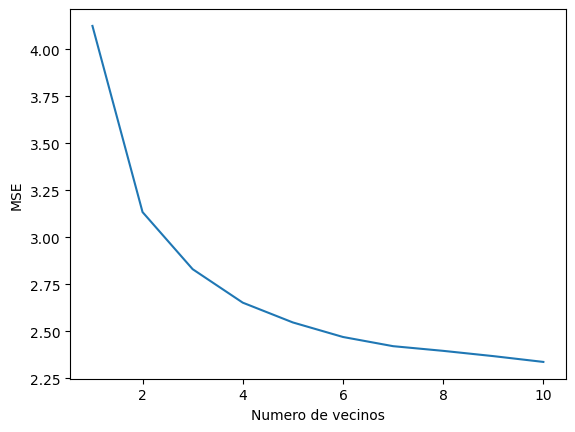

In [43]:
mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()   

In [44]:
#Predict 
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_roi = knn.predict(df_without_revenue)
df.loc[df['ROI'].isna(), 'ROI'] = imputed_roi

## 4. Conversions

In [45]:
df_trainning3 = df.copy()

In [46]:
columns_to_repair2 = ["Clicks", "Spend", "Revenue","Budget","Impressions"]

for column in columns_to_repair2:
    df_trainning3[column].fillna(df_trainning3[column].mean(), inplace=True)

C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\1636245508.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning3[column].fillna(df_trainning3[column].mean(), inplace=True)


In [47]:
df_repair_conversion = df_trainning3[["Conversions", "Clicks","Impressions","Budget","Spend","Revenue","ROI","CR","CTR"]]

In [48]:
df_with_conversion = df_repair_conversion.dropna(subset=['Conversions'])
df_without_conversion = df_repair_conversion[df_repair_conversion['Conversions'].isnull()].drop(columns='Conversions')

In [49]:
x_train, x_test, y_train, y_test = train_test_split(df_with_conversion.drop(columns='Conversions'), df_with_conversion['Conversions'], test_size=0.2, random_state=42)

scores: [-16407274.1234395  -13474070.76080853 -15041184.61761554
 -16598061.17660201 -15792714.50066187]
scores: [-12176724.44211214 -11451008.16270885 -11534194.35033182
 -12955388.73303424 -12353118.77258854]
scores: [-10740871.89077515  -9920031.08916946 -10412689.02387148
 -11332990.97296307 -11223657.76619011]
scores: [ -9928696.44897899  -9742476.21475334  -9470311.38359193
 -10503643.94288322 -10324749.59021774]
scores: [-9629180.93320671 -9530799.48666766 -9126432.05666319 -9912372.7158343
 -9583761.93621851]
scores: [-9587601.71698621 -9371558.33554683 -8973038.49324403 -9516252.9772331
 -9211528.42699922]
scores: [-9214951.73393003 -9375478.12127295 -8741438.31240223 -9279620.91533895
 -9093937.38349122]
scores: [-9056469.52678568 -9285012.35070775 -8607424.81774032 -9223123.86957307
 -9021207.87377844]
scores: [-8823579.34825023 -9178732.12227247 -8632546.07748583 -9139503.85041645
 -8878241.5806032 ]
scores: [-8847811.7116299  -9019772.13945232 -8524213.43678621 -9065549.0

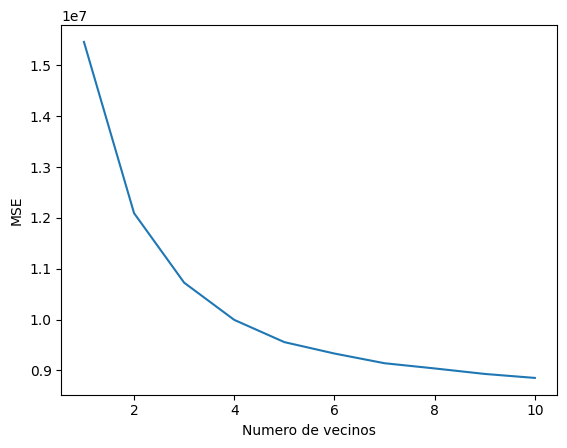

In [50]:
mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

In [51]:
#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_conversion = knn.predict(df_without_conversion)
df.loc[df['Conversions'].isna(), 'Conversions'] = imputed_conversion


## 5. Impressions

In [52]:
df_trainning4 = df.copy()


In [53]:
df_trainning4.isnull().sum()

Campaign_ID               210
Channel                     0
Product_Category            0
Region                      0
Budget                    404
Spend                     393
Impressions               393
Clicks                    391
CTR                         0
Conversions                 0
CR                          0
Revenue                   424
ROI                         0
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64

C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\3140035479.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning4[column].fillna(df_trainning4[column].mean(), inplace=True)


scores: [-1.76940997e+11 -1.74493718e+11 -1.70427986e+11 -1.74326161e+11
 -1.62794451e+11]
scores: [-1.30917580e+11 -1.33145172e+11 -1.24836022e+11 -1.28964232e+11
 -1.24457178e+11]
scores: [-1.20825196e+11 -1.13942283e+11 -1.11165464e+11 -1.11880330e+11
 -1.11011795e+11]
scores: [-1.12473832e+11 -1.01172950e+11 -1.06985215e+11 -1.04958649e+11
 -1.01891102e+11]
scores: [-1.09219932e+11 -1.00266020e+11 -9.99851065e+10 -1.01460638e+11
 -9.69613525e+10]
scores: [-1.05948514e+11 -9.72709460e+10 -9.66496612e+10 -9.56787476e+10
 -9.63388029e+10]
scores: [-1.03487151e+11 -9.44306105e+10 -9.60936772e+10 -9.34754396e+10
 -9.39861363e+10]
scores: [-1.02079063e+11 -9.23628019e+10 -9.34417252e+10 -9.11761905e+10
 -9.25274071e+10]
scores: [-1.00820009e+11 -9.10518091e+10 -9.10186308e+10 -9.00652249e+10
 -9.30174437e+10]
scores: [-9.89597832e+10 -9.06479515e+10 -9.11091341e+10 -9.00673198e+10
 -9.19947754e+10]


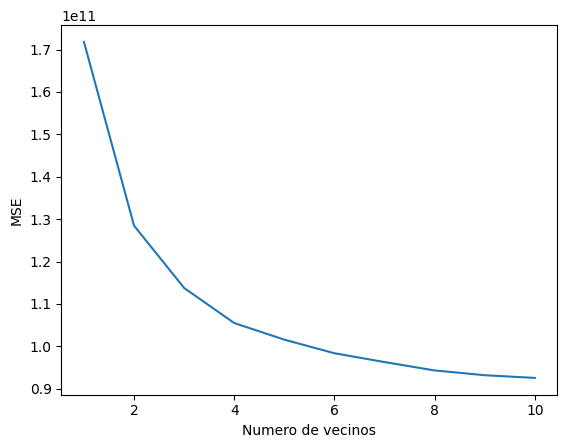

In [54]:
df_trainning4 = df.copy()

columns_to_repair3 = ["Clicks", "Spend", "Revenue","Budget"]

for column in columns_to_repair3:
    df_trainning4[column].fillna(df_trainning4[column].mean(), inplace=True)

df_repair_impressions = df_trainning4[["Clicks","Conversions","Budget","Spend","Revenue","ROI","CR","CTR","Impressions"]]

df_with_impressions = df_repair_impressions.dropna(subset=['Impressions'])
df_without_impressions = df_repair_impressions[df_repair_impressions['Impressions'].isnull()].drop(columns='Impressions')

x_train, x_test, y_train, y_test = train_test_split(df_with_impressions.drop(columns='Impressions'), df_with_impressions['Impressions'], test_size=0.2, random_state=42)

mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()




In [55]:
#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_impressions = knn.predict(df_without_impressions)
df.loc[df['Impressions'].isna(), 'Impressions'] = imputed_impressions

In [56]:
df.isnull().sum()

Campaign_ID               210
Channel                     0
Product_Category            0
Region                      0
Budget                    404
Spend                     393
Impressions                 0
Clicks                    391
CTR                         0
Conversions                 0
CR                          0
Revenue                   424
ROI                         0
Duration                    0
Start_Date                  0
End_Date                    0
Customer_Satisfaction       0
Campaign_Effectiveness      0
Market_Segment              0
dtype: int64

## 6. Clicks

C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\2033520056.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning5[column].fillna(df_trainning5[column].mean(), inplace=True)


scores: [-4.79800223e+08 -4.56783400e+08 -4.36789860e+08 -4.65227335e+08
 -4.18711897e+08]
scores: [-3.41109982e+08 -3.49356415e+08 -3.23778825e+08 -3.47400335e+08
 -3.00883425e+08]
scores: [-3.06647043e+08 -3.15184167e+08 -2.86302244e+08 -3.10228506e+08
 -2.61538634e+08]
scores: [-2.95699534e+08 -2.98713446e+08 -2.64226096e+08 -2.86154108e+08
 -2.52500897e+08]
scores: [-2.79153971e+08 -2.87419201e+08 -2.50554422e+08 -2.78683892e+08
 -2.54126944e+08]
scores: [-2.70440744e+08 -2.77964829e+08 -2.42954446e+08 -2.70893660e+08
 -2.45069074e+08]
scores: [-2.64426890e+08 -2.72556057e+08 -2.42614745e+08 -2.71507460e+08
 -2.39829813e+08]
scores: [-2.58249484e+08 -2.65966993e+08 -2.38885598e+08 -2.67393356e+08
 -2.36693518e+08]
scores: [-2.57997248e+08 -2.59404045e+08 -2.33836278e+08 -2.64033551e+08
 -2.32940755e+08]
scores: [-2.52742515e+08 -2.51038390e+08 -2.28480462e+08 -2.62619237e+08
 -2.29640822e+08]


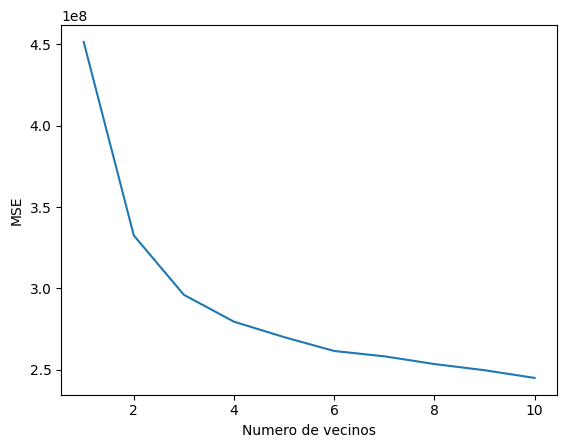

In [59]:
df_trainning5 = df.copy()

columns_to_repair4 = ["Spend", "Revenue","Budget"]

for column in columns_to_repair4:
    df_trainning5[column].fillna(df_trainning5[column].mean(), inplace=True)

df_repair_clicks = df_trainning5[["Clicks","Conversions","Budget","Spend","Revenue","ROI","CR","CTR","Impressions"]]

df_with_clicks = df_repair_clicks.dropna(subset=['Clicks'])
df_without_clicks = df_repair_clicks[df_repair_clicks['Clicks'].isnull()].drop(columns='Clicks')

# Ensure there are no NaN values in the training data
x_train, x_test, y_train, y_test = train_test_split(df_with_clicks.drop(columns='Clicks').dropna(), df_with_clicks['Clicks'].dropna(), test_size=0.2, random_state=42)

mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_clicks = knn.predict(df_without_clicks)
df.loc[df['Clicks'].isna(), 'Clicks'] = imputed_clicks



## 7. Revenue

C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\2989766709.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning6[column].fillna(df_trainning6[column].mean(), inplace=True)


scores: [-1.64344837e+11 -1.52267398e+11 -1.63534295e+11 -1.54978395e+11
 -1.73994141e+11]
scores: [-1.23895487e+11 -1.12816379e+11 -1.18358024e+11 -1.24087081e+11
 -1.24597661e+11]
scores: [-1.10112133e+11 -1.05319502e+11 -1.04018015e+11 -1.08874839e+11
 -1.07357093e+11]
scores: [-1.02852818e+11 -1.00360176e+11 -9.62010278e+10 -1.01903083e+11
 -1.03132821e+11]
scores: [-9.78317921e+10 -9.85107924e+10 -8.83852426e+10 -9.92092028e+10
 -9.78155060e+10]
scores: [-9.50054057e+10 -9.65405752e+10 -8.77857086e+10 -9.71375858e+10
 -9.44994334e+10]
scores: [-9.31847160e+10 -9.44860912e+10 -8.80951075e+10 -9.58308254e+10
 -9.31653595e+10]
scores: [-9.17058937e+10 -9.53950391e+10 -8.86601891e+10 -9.52402485e+10
 -9.16958883e+10]
scores: [-9.10372097e+10 -9.48622509e+10 -8.51807379e+10 -9.44470075e+10
 -9.15943954e+10]
scores: [-9.06987601e+10 -9.31521835e+10 -8.45932648e+10 -9.39907381e+10
 -9.09053762e+10]


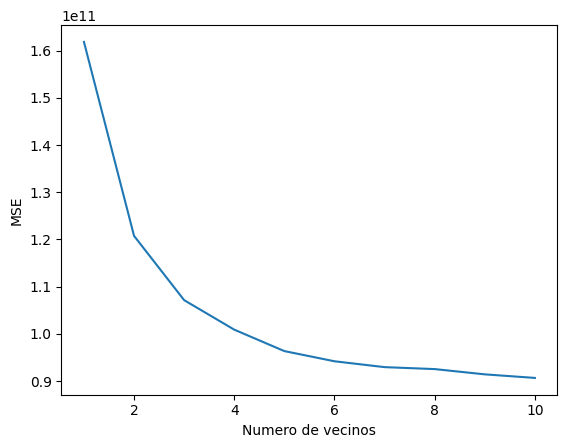

In [61]:
df_trainning6 = df.copy()

columns_to_repair5 = ["Spend","Budget"]

for column in columns_to_repair5:
    df_trainning6[column].fillna(df_trainning6[column].mean(), inplace=True)

df_repair_revenue = df_trainning6[["Clicks","Conversions","Budget","Spend","Revenue","ROI","CR","CTR","Impressions"]]

df_with_revenue = df_repair_revenue.dropna(subset=['Revenue'])
df_without_revenue = df_repair_revenue[df_repair_revenue['Revenue'].isnull()].drop(columns='Revenue')

x_train, x_test, y_train, y_test = train_test_split(df_with_revenue.drop(columns='Revenue'), df_with_revenue['Revenue'], test_size=0.2, random_state=42)

mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_revenue = knn.predict(df_without_revenue)
df.loc[df['Revenue'].isna(), 'Revenue'] = imputed_revenue


## 8. Spend

C:\Users\Germán\AppData\Local\Temp\ipykernel_16776\717220445.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trainning7[column].fillna(df_trainning7[column].mean(), inplace=True)


scores: [-3.38370395e+10 -3.34415103e+10 -3.54030237e+10 -3.43467431e+10
 -3.51358884e+10]
scores: [-2.37236424e+10 -2.52591792e+10 -2.54092617e+10 -2.47658815e+10
 -2.54207457e+10]
scores: [-2.17462211e+10 -2.34477077e+10 -2.26703478e+10 -2.25246552e+10
 -2.23331789e+10]
scores: [-2.05059371e+10 -2.17932610e+10 -2.13862004e+10 -2.15276768e+10
 -2.03788305e+10]
scores: [-2.04630633e+10 -2.11472359e+10 -2.05605597e+10 -2.06755267e+10
 -1.94231604e+10]
scores: [-1.97858035e+10 -2.02578975e+10 -1.93354520e+10 -1.98750486e+10
 -1.85999038e+10]
scores: [-1.97107593e+10 -1.95986105e+10 -1.91618702e+10 -1.93574898e+10
 -1.83359173e+10]
scores: [-1.97107555e+10 -1.93250916e+10 -1.93427240e+10 -1.90849759e+10
 -1.77039638e+10]
scores: [-1.95960856e+10 -1.95590902e+10 -1.90385318e+10 -1.87030736e+10
 -1.71606874e+10]
scores: [-1.94719332e+10 -1.92029856e+10 -1.86583048e+10 -1.84958204e+10
 -1.69944481e+10]


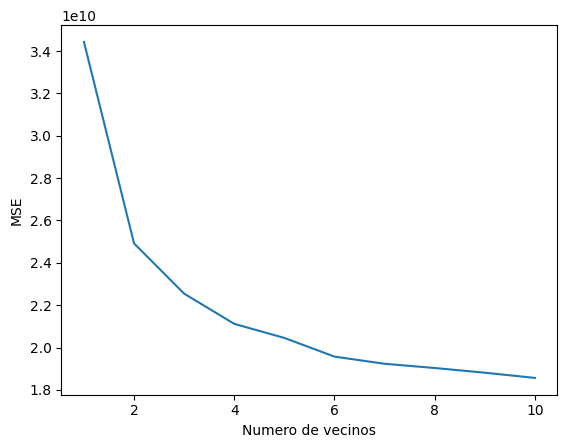

In [ ]:
df_trainning7 = df.copy()

columns_to_repair6 = ["Budget"]

for column in columns_to_repair6:
    df_trainning7[column].fillna(df_trainning7[column].mean(), inplace=True)

df_repair_spend = df_trainning7[["Clicks","Conversions","Budget","Spend","Revenue","ROI","CR","CTR","Impressions"]]

df_with_spend = df_repair_spend.dropna(subset=['Spend'])
df_without_spend = df_repair_spend[df_repair_spend['Spend'].isnull()].drop(columns='Spend')

x_train, x_test, y_train, y_test = train_test_split(df_with_spend.drop(columns='Spend'), df_with_spend['Spend'], test_size=0.2, random_state=42)

mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_spend = knn.predict(df_without_spend)
df.loc[df['Spend'].isna(), 'Spend'] = imputed_spend


## 9. Budget

scores: [-3.84177595e+10 -4.06061829e+10 -3.99816146e+10 -3.74416582e+10
 -4.18367541e+10]
scores: [-2.80558996e+10 -2.92018875e+10 -2.80748599e+10 -2.58140297e+10
 -3.09497806e+10]
scores: [-2.54232339e+10 -2.66642200e+10 -2.49378562e+10 -2.37755046e+10
 -2.72073736e+10]
scores: [-2.38849051e+10 -2.41718157e+10 -2.40499431e+10 -2.25900671e+10
 -2.54178311e+10]
scores: [-2.25548682e+10 -2.34519789e+10 -2.28987189e+10 -2.19957227e+10
 -2.44264058e+10]
scores: [-2.24888643e+10 -2.23685621e+10 -2.24325251e+10 -2.14967351e+10
 -2.29684234e+10]
scores: [-2.19078415e+10 -2.18919002e+10 -2.18482593e+10 -2.09429050e+10
 -2.20779147e+10]
scores: [-2.17169538e+10 -2.15337551e+10 -2.18187769e+10 -2.09197101e+10
 -2.17075501e+10]
scores: [-2.17510570e+10 -2.13638671e+10 -2.17497240e+10 -2.06535786e+10
 -2.09847090e+10]
scores: [-2.15742515e+10 -2.10891814e+10 -2.14050713e+10 -2.04117254e+10
 -2.06623707e+10]


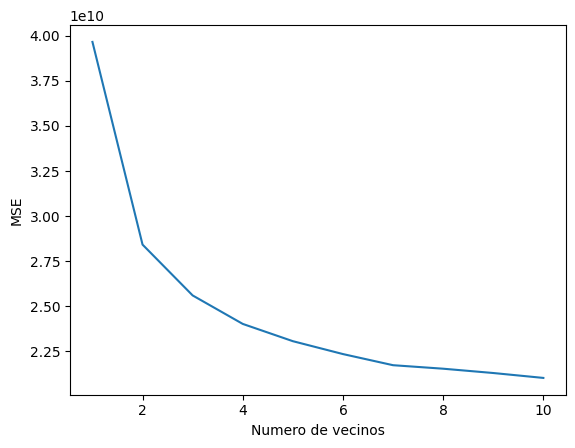

In [68]:
df_trainning8 = df.copy()

# Ensure all columns used for training are numeric
df_repair_budget = df_trainning8[["Clicks","Conversions","Budget","Spend","Revenue","ROI","CR","CTR","Impressions"]].apply(pd.to_numeric, errors='coerce')

df_with_budget = df_repair_budget.dropna(subset=['Budget'])
df_without_budget = df_repair_budget[df_repair_budget['Budget'].isnull()].drop(columns='Budget')

x_train, x_test, y_train, y_test = train_test_split(df_with_budget.drop(columns='Budget'), df_with_budget['Budget'], test_size=0.2, random_state=42)

mse = []
k_range = range(1, 11)

for k in range(1, 11):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse.append(-scores.mean())
    print(f"scores: {scores}")

plt.plot(k_range, mse)
plt.xlabel('Numero de vecinos')
plt.ylabel('MSE')
plt.show()

#Predict
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train, y_train)
imputed_budget = knn.predict(df_without_budget)
df.loc[df['Budget'].isna(), 'Budget'] = imputed_budget

## 10. Campaign_ID

In [74]:
# Función para rellenar los valores nulos en Campaign_ID
def fill_campaign_id(series):
    last_value = None
    for i in range(len(series)):
        if pd.isnull(series[i]):
            if last_value is not None:
                # Extraer el número de la última campaña y sumar 1
                last_number = int(last_value[3:])
                new_value = f"CAM{last_number + 1:04d}"
                series[i] = new_value
        last_value = series[i]
    return series

# Aplicar la función para rellenar los valores nulos en Campaign_ID
df['Campaign_ID'] = fill_campaign_id(df['Campaign_ID'].values)

# Verificar los valores nulos después de la imputación
print("Valores nulos en Campaign_ID después de la imputación:")
print(df['Campaign_ID'].isnull().sum())

Valores nulos en Campaign_ID después de la imputación:
0


# EDA